# Health Insurance Cross Sell - Exploratory Data Analysis


## **Problem Statement**
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.


## **Goals**
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.



## **Column descripiton**

- **id**: "Unique ID for the customer.",
- **Gender**: "Gender of the customer.",
- **Age**: "Age of the customer.",
- **Driving License**: "0: Doesn't have DL, 1: have DL.",
- **Region Code**: "Unique code for the region of the customer.",
- **Previously insurance**:"1 : Customer already has Vehicle insurance, 0 : Customer doesn't have Vehicle insurance.",
- **Vehicle Age**: "Age of the Vehicle.",
- **Vehicle Damage**:"1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.",
- **Annual premium**: "The amount customer needs to pay as premium in the year.",
- **Policy sales channel**: "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.",
- **Vintage**: "Number of Days, Customer has been associated with the company.",
- **Response**: "1 : Customer is interested, 0 : Customer is not interested."


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')


df =pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [4]:
df.describe(include=object)

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [5]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
### Getting all the unique value of the columns 

for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")

id :
[     1      2      3 ... 381107 381108 381109]

Gender :
['Male' 'Female']

Age :
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License :
[1 0]

Region_Code :
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured :
[0 1]

Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage :
['Yes' 'No']

Annual_Premium :
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel :
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.

In [7]:
df_desc = []
j = 0
for column in df.columns:
  df_desc.append(
      [
       column,
       df[column].dtypes,
       df[column].isnull().sum(),
       round(df[column].isnull().sum()/len(df)*100, 2),
       df[column].nunique(),
       df[column].unique()
       ]
       )
  j += 1

column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.0,381109,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3..."
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,..."
5,Previously_Insured,int64,0,0.0,2,"[0, 1]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,float64,0,0.0,48838,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ..."
9,Policy_Sales_Channel,float64,0,0.0,155,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ..."


## Checking Outliers 

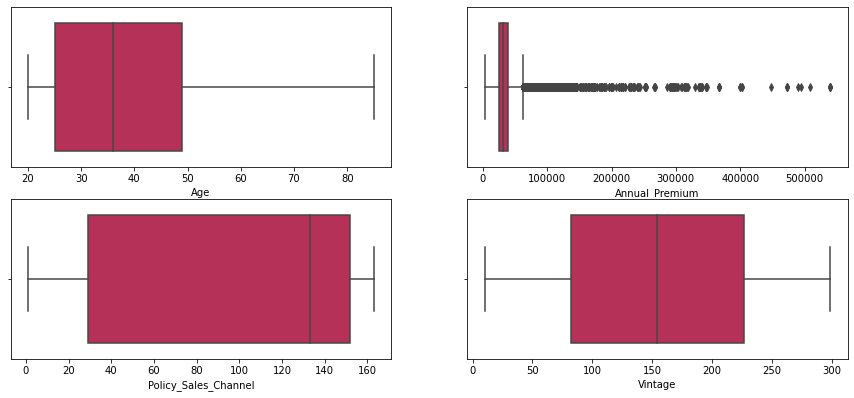

In [8]:
df_describe = df.drop(columns = ['id', 'Region_Code','Driving_License','Vehicle_Damage', 'Gender','Vehicle_Age','Response','Previously_Insured'])


plt.figure(figsize = (15, 10))
x = 1      

for column in df_describe.describe():
    plt.subplot(3,2,x)
    sns.boxplot(df[column],palette='rocket')
    x += 1
    
# It is to clear see, there are many outliers on column Annual_Premium

## Binning

### Age Binning

- 0-14 years (children), 
- 15-24 years (early working age) 
- 25-54 years (prime working age)
- 55-64 years (mature working age)
- 65 years and over (elderly)

In [9]:
age_binning = [15, 25, 55, 65, df['Age'].max()]
label = ['early working age', 'prime working age', 'mature working age', 'elderly']

df['Age_group'] = pd.cut(df['Age'], bins = age_binning, labels = label)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,prime working age
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,elderly
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,prime working age
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,early working age
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,prime working age


### Annual premium Binning

- 0 - 25000: 5th Class
- 25000 - 50000: 4th Class
- 50000 - 100000: Bronze
- 100000 - 150000: Silver
- 150000 - max: Gold

In [10]:
Ann_premi_group = [0, 25000, 50000, 100000, 150000, df['Annual_Premium'].max()]
label = ['5th class', '4th class', 'Bronze', 'Silver', 'Gold']

df['Group Annual Premium'] = pd.cut(df['Annual_Premium'], bins = Ann_premi_group, labels = label)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group,Group Annual Premium
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,prime working age,4th class
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,elderly,4th class
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,prime working age,4th class
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,early working age,4th class
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,prime working age,4th class


## Univariate Data Analysis

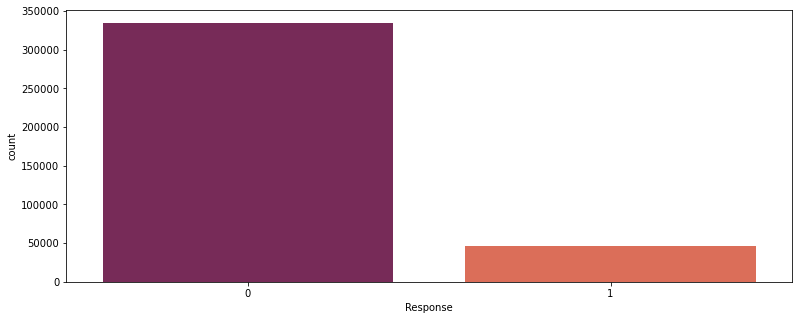

In [11]:
plt.figure(figsize = (13, 5))
sns.countplot(df['Response'], palette = 'rocket')
plt.show()

Most Customers don't have Interest on health insurance

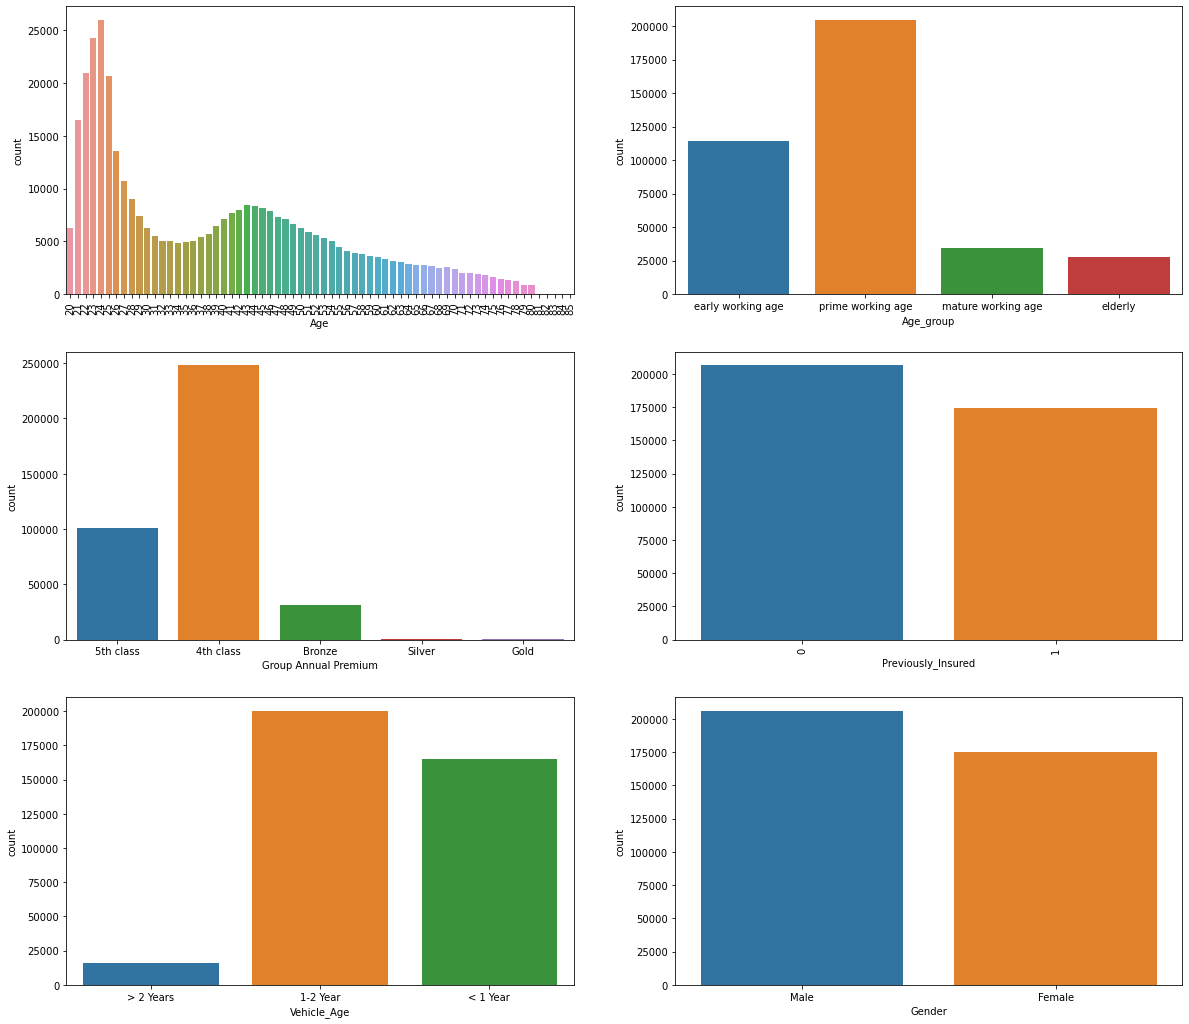

In [12]:
plt.figure(figsize = (20, 18))

plt.subplot(3,2,1)
sns.countplot(df['Age'])
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.countplot(df['Age_group'])

plt.subplot(3,2,3)
sns.countplot(df['Group Annual Premium'])

plt.subplot(3,2,4)
sns.countplot(df['Previously_Insured'])
plt.xticks(rotation=90)

plt.subplot(3,2,5)
sns.countplot(df['Vehicle_Age'])

plt.subplot(3,2,6)
sns.countplot(df['Gender'])

plt.show()

## Crosstab Analysis

In [13]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_group',
       'Group Annual Premium'],
      dtype='object')

col_0     Average Age
Response             
0           38.178227
1           43.435560


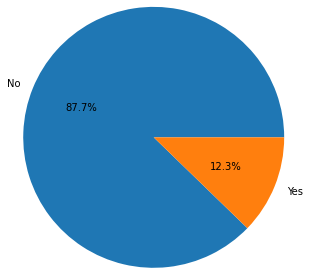

In [14]:
# Response Percentage

print(pd.crosstab(index = df['Response'], columns = 'Average Age', values = df['Age'], aggfunc='mean'))

persentase = df.Response.value_counts().values
nama = ['No',"Yes"]
plt.pie(persentase, labels=nama,
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1.5)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

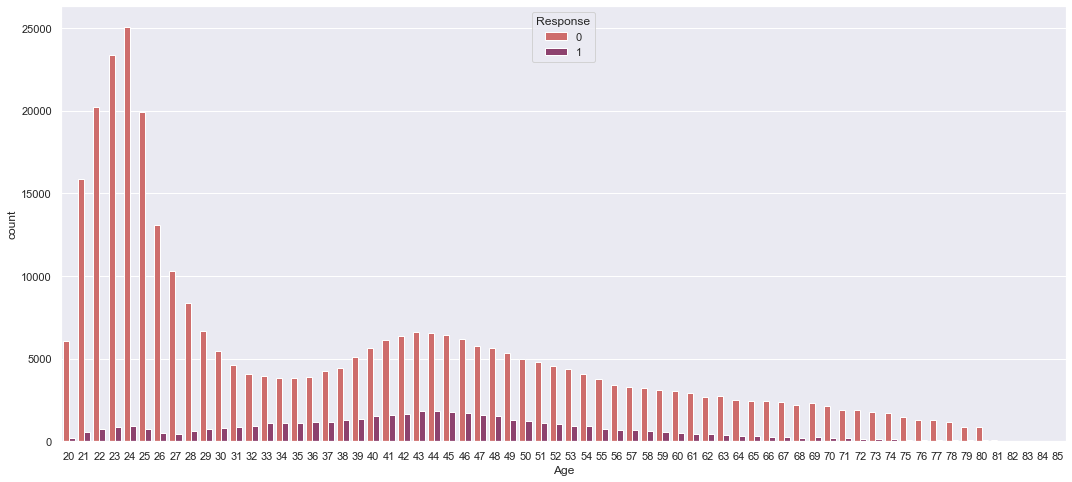

In [28]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'],palette='flare')

Age_group  early working age  prime working age  mature working age   elderly
Response                                                                     
0                   0.964657           0.826247            0.858992  0.916812
1                   0.035343           0.173753            0.141008  0.083188



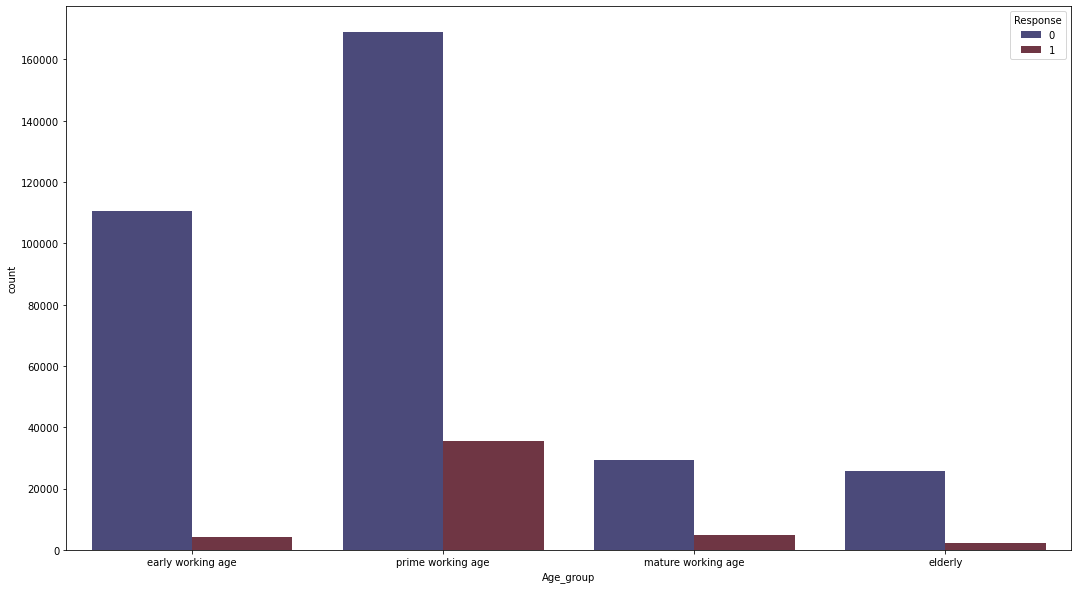

In [16]:
# Response percentage based on Age Group

print(pd.crosstab(index = df['Response'], columns = df['Age_group'], normalize = 'columns'))
print('')
plt.figure(figsize = (18, 10))
sns.countplot(df['Age_group'], hue = df['Response'], palette = 'icefire')
plt.show()

Gender                Female      Male
Age_group                             
early working age   0.366095  0.244705
prime working age   0.499297  0.567721
mature working age  0.067741  0.108162
elderly             0.066867  0.079412



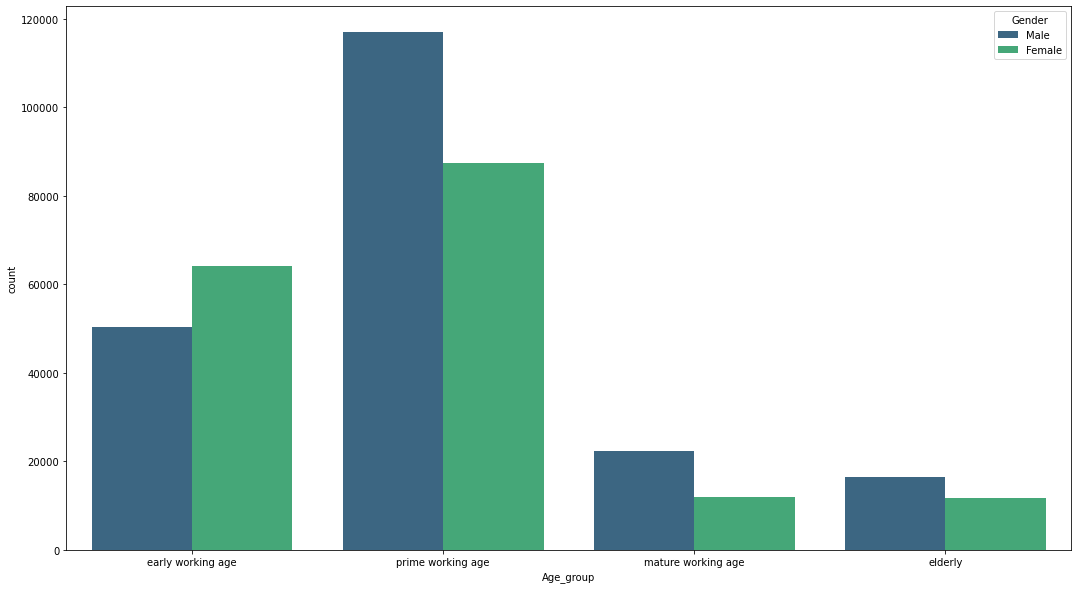

In [17]:
# Age Group percentage based on Gender

print(pd.crosstab(index = df['Age_group'], columns = df['Gender'], normalize = 'columns'))
print('')
plt.figure(figsize = (18, 10))
sns.countplot(df['Age_group'], hue = df['Gender'], palette = 'viridis')
plt.show()

Group Annual Premium  5th class  4th class    Bronze    Silver      Gold
Response                                                                
0                      0.882918   0.879044  0.848024  0.846678  0.827225
1                      0.117082   0.120956  0.151976  0.153322  0.172775



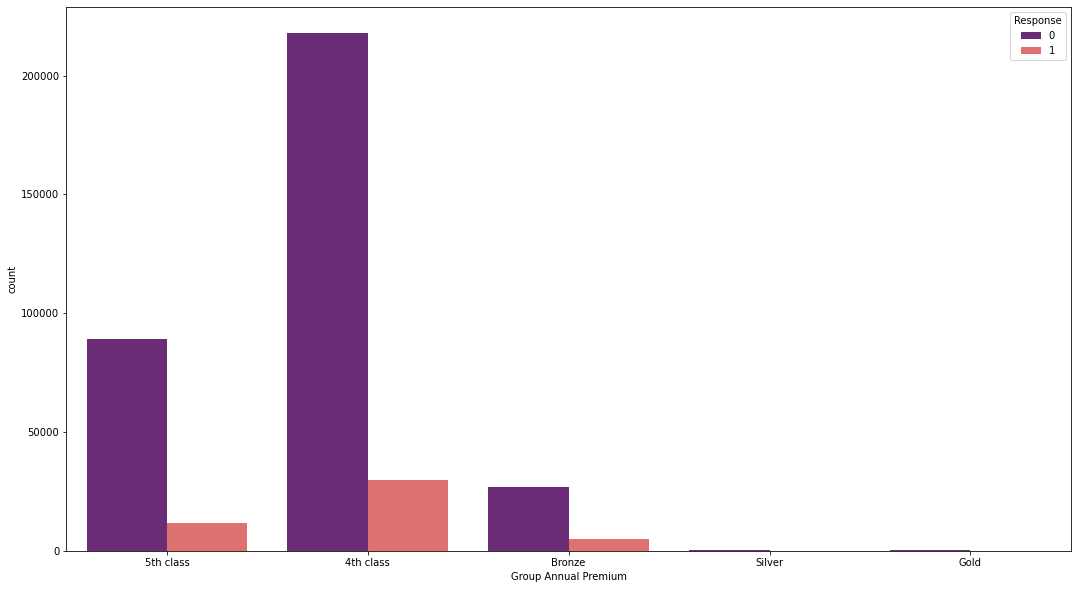

In [18]:
# Response percentage based on Group Annual Premium

print(pd.crosstab(index = df['Response'], columns = df['Group Annual Premium'], normalize = 'columns'))
print('')
plt.figure(figsize = (18, 10))
sns.countplot(df['Group Annual Premium'], hue = df['Response'], palette = 'magma')
plt.show()

Previously_Insured         0         1
Vehicle_Damage                        
No                  0.116185  0.943182
Yes                 0.883815  0.056818



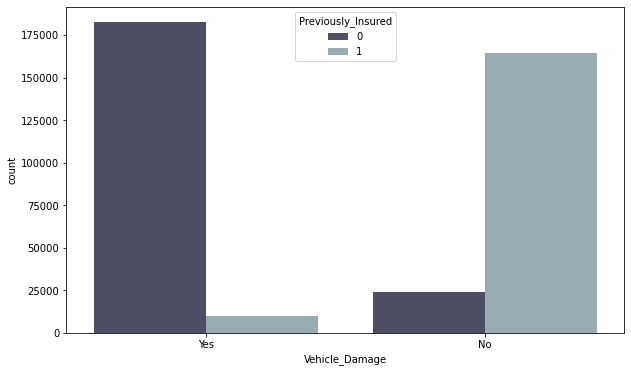

In [19]:
print(pd.crosstab(index = df['Vehicle_Damage'], columns = df['Previously_Insured'], normalize = 'columns'))
print('')

plt.figure(figsize = (10, 6))
sns.countplot(df['Vehicle_Damage'], hue = df['Previously_Insured'], palette = 'bone')
plt.show()

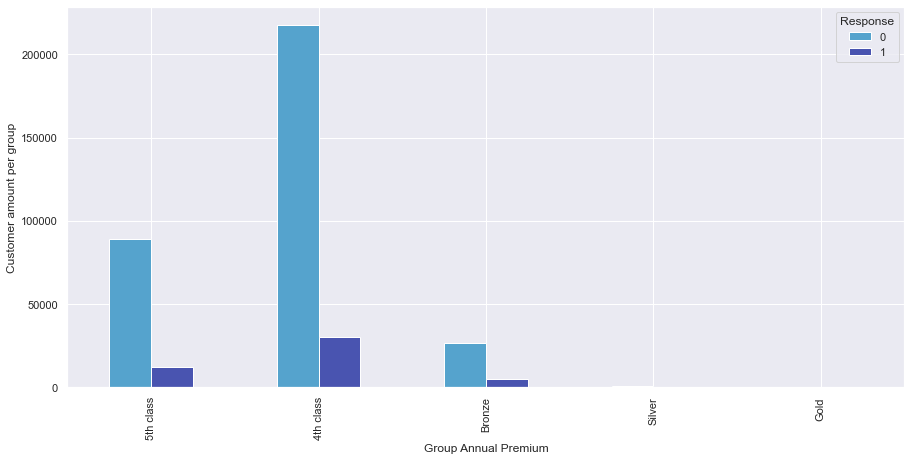

In [20]:
Response_premiGroup_VehicleAge=pd.crosstab(index = df['Group Annual Premium'], columns = df['Response'])

sns.set(rc={'figure.figsize':(15,7)},palette='icefire')
Response_bar = Response_premiGroup_VehicleAge.plot(kind='bar')

Response_bar.set_xlabel('Group Annual Premium')
Response_bar.set_ylabel('Customer amount per group')

plt.show()

Response         0      1
Region_Code              
28.0         86498  19917
8.0          30620   3257
46.0         17717   2032
41.0         16039   2224
15.0         12350    958
30.0         11291    900
29.0          9700   1365
50.0          9601    642
11.0          8191   1041
36.0          8094    703


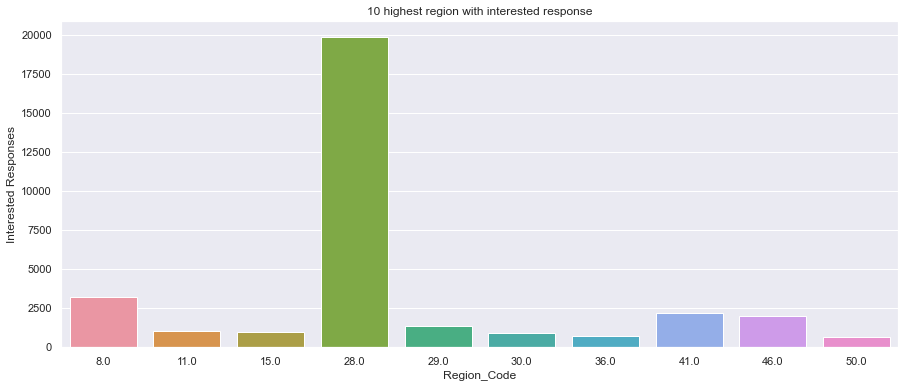

In [29]:
top10_region =  pd.crosstab(index = df['Region_Code'], columns = df['Response']).sort_values(0, ascending = False).head(10)
print(top10_region)

plt.figure(figsize = (15, 6))

sns.barplot(x = top10_region.index, y = top10_region[1])
plt.ylabel('Interested Responses')
plt.title('10 highest region with interested response')
plt.show()

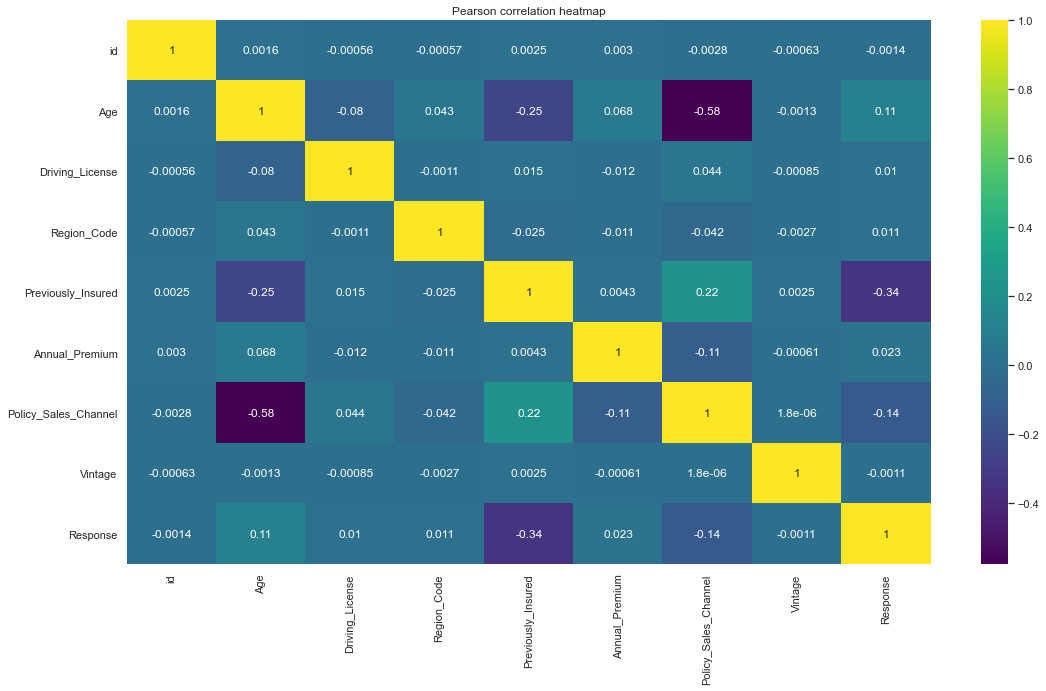

In [23]:
df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Pearson correlation heatmap')
plt.show()

## **EDA - Summary**

#### 1. Outliers number are mostly found on feature 'annual premium'.
    Most of them are found only on Annual Premium, which the data is quite wide spreaded.
    
#### 2. Male as majority customer
    In each Group of age, there are more male customers in compare to female, there is only in 'early working age' is to be found the female number is slightly higher.

#### 3. Most of the customer are not interested in getting the insurance.
    Most of our customer are in early/prime working age group, most of them are possibly are not
    having so much attention on health insurance.

#### 4. Most of the customer are on 4th and 5th Class respectively (0-50000 annual premium).
    - 0 - 25000: 5th Class
    - 25000 - 50000: 4th Class
    
#### 5. Most of the customer, who their vehicles ever gotten damaged are responsing positively.
    Most of our customer are getting more aware with vehicle protection, once theirs got hit/damaged.
    
## **EDA - Recommendation**

#### 1. Educate customers who had history vehicle damaged.
    It is easier to educate customers, who has suffered vehicles damage to get vehicle insurance. In order to protect their vehicle better and safer, avoiding such a bad past experience. Showing some benefits of having insurance would be easier targeting relevant customers.
    
#### 2. Spreading our business to younger customer.
    Business team could spread our business wider to younger generation and educated them the awareness of having vehicle insurance. The sooner is the better, they realize, that they don't have to ovethink, in case their vehicles got crashed or problems.